# ODE's
Differential equations solutions are a function or a set of functions

## linear

it needs to have this form

$y' + p(t)y = g(t)$

The way you solve it is by using the integrating factor

$u(t) = e^{\int p(t)dt}$

where $u(t)$ is the integrating factor

## seperable

has the form

$N(y) \frac{dy}{dx} = M(x)$

or 

$N(y) \cdot dy = M(x) \cdot dx$

to solve these you simply integrate both sides

$\int N(y) \cdot dy =\int M(x) \cdot dx$

## homogenous

the strategy to solve these is 

$v = \frac{y}{x}$

## exact

takes the form

$M(x,y) + N(x,y)y' = 0$

which is

$\frac{\partial M}{\partial y} = \frac{\partial N}{\partial y}$

## Im going to solve a differenctial equation using pyhton

the equations is 

$\tau \frac{dy}{dt} = -y + ku$

where $\tau$ is the time constant and k is the gain u is the unit step 

I will use $\tau = 5$ and $k=2$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def first_order(y, t, tau, K, u):
    dydt = (-y + K*u(t))/tau
    return dydt

I need to define the unit step function, it returns 1 if time is greater than 0

In [3]:
u = lambda t: 0 if t<0 else 1

next I need to define the other constants

In [4]:
tau = 5
K = 2

lastly i need to define the time. this will be from 0 to 10 in increments of 100

In [5]:
t = np.linspace(0,10,100)

In [6]:
y = odeint(first_order,0,t,args=(tau,K,u))

odeint is a library that solves first order differential equations

Text(0, 0.5, 'amplitude')

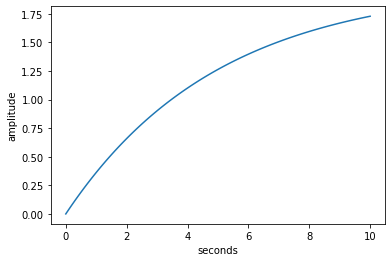

In [7]:
plt.plot(t,y)
plt.xlabel("seconds")
plt.ylabel("amplitude")

we can even change the step function. lets say it starts at 3

In [8]:
u = lambda t: 0 if t < 3 else 1

In [9]:
y = odeint(first_order,0,t,args=(tau,K,u))

Text(0, 0.5, 'amplitude')

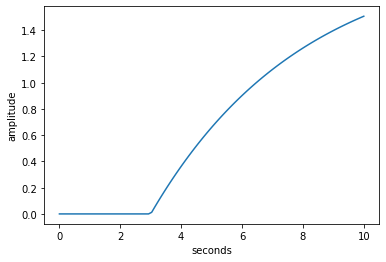

In [10]:
plt.plot(t,y)
plt.xlabel("seconds")
plt.ylabel("amplitude")

# systems of differential equations

This led me to thinking about systems of differential equations. that takes the form

$$x' = Ax$$

for example

$$\begin{pmatrix} x_1' \\ x_2' \end{pmatrix} = \begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$$

This is the first time I've done something like this

## determine the eigenvalues

first determine the eigenvalues of A via $|A - \lambda I| = 0$

we need to find the values of lambda where the determinant equals 0

$$\begin{vmatrix}
1-\lambda & 2 \\
2 & 4-\lambda
\end{vmatrix} = 0 $$

$$ (1-\lambda) (4 -\lambda) - 2^2 = 0$$

$$\lambda (\lambda -5) $$

$\lambda = 0$ or $\lambda = 5$

## determine the eigenvectors

$$(A - \lambda I)v=0 $$
solve for v

### case $\lambda = 0$

$$\begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$


$$ v_1 + 2v_2 = 0$$ 


I'll choose $v_2 = 1$ and $v_1 = -2$

so the eigenvector for $\lambda =0$ will be $\begin{pmatrix} -2 \\ 1 \end{pmatrix}$ of course you can have any multiple of the eigenvector which will also be an eigenvector

### case $\lambda = 5$

$$\begin{pmatrix} -4 & 2 \\ 2 & -1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

so $2v_1 = v_2$

the eigenvector in this case is $\begin{pmatrix} 1 \\ 2 \end{pmatrix}$

## general solution

for distinct real eigenvalues $\lambda_1, \lambda_2, ... \lambda_n$ and eigenvectors $\eta_1, \eta_2, ... \eta_n$ the general solution takes the form

$$ x = c_1 e^{\lambda_1 t} \eta_1 + c_2 e^{\lambda_2 t} \eta_2 + ... + c_n e^{\lambda_n t} \eta_n$$

plugging in the known values

$$x(t) = c_1 \begin{pmatrix} -2 \\ 1 \end{pmatrix} e^{0t} + c_2 \begin{pmatrix} 1 \\ 2 \end{pmatrix} e^{5 t}$$

which finally is 

$$x(t) = c_1 \begin{pmatrix} -2 \\ 1 \end{pmatrix} + c_2 \begin{pmatrix} 1 \\ 2 \end{pmatrix} e^{5 t} $$

## linear independence 

to check if they are linearly independent you take the two sides of the equation and find their determinant if its non-zero then they are linearly independent

$$\begin{vmatrix}
-2 & e^{5t} \\
1 & 2e^{5t}
\end{vmatrix} = -4e^{5t} - e^{5t} = -5e^{5t}$$
which is not zero

# using Laplace transform to solve Differential equations

this is just a quick review on how to solve differential equations using Laplace

## problem

$$y'' + 5y' + 6y = 0 ~~~~~\text{where:}~~ y(0) =2 ~~~ y'(0) = 3$$

first take the Laplace transform of both sides

$$\mathcal{L}\{y''\} + 5\mathcal{L}\{y'\} + 6\mathcal{L}\{y\} = \mathcal{L}\{0\}$$

$$ \mathcal{L}\{y^{n}\} = s^{n} \mathcal{L}\{y\} - s^{n-1}y(0) - ... - sy^{n-2}(0) - y^{n-1}(0)$$

$$ s^2 \mathcal{L}\{y\}-2s-3 + 5s\mathcal{L}\{y\} - 2 + 6 \mathcal{L}\{y\} = 0$$

factor the Laplace

$$ \mathcal{L}\{y\} (s^2 + 5s + 6)- 2s -13 = 0$$

get $\mathcal{L}\{y\}$ by itself

$$ \mathcal{L}\{y\} = \frac{2s + 13}{s^2 + 5s +6}$$

inverse Laplace both sides

$$\mathcal{L^{-1}}\{\mathcal{L}\{y\}\} = \mathcal{L^{-1}}\left\{\frac{2s + 13}{s^2 + 5s +6}\right\}$$

$$y = e^{-3t}(9e^t -7)$$

# Non homogeneous equations

$$ y'' + y = \text{sin} 2t ~~~~~\text{where}~~ y(0) = 2~~~y'(0) = 1$$

Laplace
$$s^2 Y(s) - 2s - 1 + Y(s) = \frac{2}{s^2 + 4}$$

$$Y(s)(s^2 + 1) - 2s -1 = \frac{2}{s^2 + 4}$$

$$Y(s) = \frac{\frac{2}{s^2 + 4} + 2s + 1}{s^2 + 1}$$

inverse Laplace

$$ y = \frac{1}{3}(5 \text{sin}(t) - \text{sin}(2t) + 6 \text{cos}(t))$$

## step function

solving a differential equation with a step function using Laplace

$$ y'' + 4y = \text{sin}(t) - \mu_{2\pi} (t) - \text{sin} (t-2\pi) ~~~~~ \text{where} ~~ y(0) = 0 ~~ y'(0) = 0$$

Laplace transform

$$s^2 \mathcal{L}\{y\} - sy(0) - y'(0) + 4\mathcal{L}\{y\} = \frac{1}{s^2 + 1} - e^{-2\pi s} \frac{1}{s^2 + 1}$$ 

$$s^2 \mathcal{L}\{y\}+ 4\mathcal{L}\{y\} = \frac{1}{s^2 + 1} - e^{-2\pi s} \frac{1}{s^2 + 1}$$ 

$$ \mathcal{L}\{y\} ( s^2 + 4) = \frac{1}{s^2 + 1} - \frac{e^{-2\pi s}}{s^2 + 1} $$

$$\mathcal{L}\{y\} = \frac{\frac{1}{s^2 + 1} - \frac{e^{-2\pi s}}{s^2 + 1}}{s^2 + 4}$$

$$ y = \frac{-2}{3} ( \theta (t - 2 \pi) - 1) \text{sin}^2 \bigl ( \frac{t}{2} \bigr ) \text{sin} (t) $$

# water tank notes
![alt text](tank.png)

first how do we find y(t)

I know that the pressure at the bottom of a tank can be simulated as $\rho g h$ where $\rho$ is the density g is gravity and h is the depth of the water

so y(t) will depend on $\rho ghR$ and R will be the resistance and that can the cross sectional area or the material of the outlet. it can be lots of things. 

next i want to know what the rate of change in the volume stored

$$\frac{dV}{dt} = A \frac{dh}{dt} = f_{in} - f_{out}$$

i know what flow out is

$$A \frac{dh}{dt} + R \rho g h = f_{in}$$

which can be rearranged as 

$$\frac{A}{R \rho g} \frac{dh}{dt} + h = \frac{1}{R \rho g} f_{in}$$

this is time constant form. therefore

$$\tau \frac{dh}{dt} + h = K f_{in} ~~~~~ \text{where}~~ \tau = \frac{A}{R \rho g} ~~~ K = \frac{1}{R \rho g}$$

notice that if the cross sectional area is increased the time constant increases, if the resistance increases then $\tau$ decreases

# state spaces


the state based system

$$\dot{\pmb{q}}(t) =  \pmb{A}\pmb{q}(t) + \pmb{B}u(t)$$
$$ y(t) = \pmb{C} \pmb{q}(t) + Du(t)$$

now i can take the laplace transform of this

$$ s\pmb{Q}(s) = \pmb{A}\pmb{Q}(s) + \pmb{B}U(s)$$ 

$$ Y(s) = \pmb{C} \pmb{Q}(s) + DU(s)$$

I want the transfer function $H(s) = \frac{Y(s)}{U(s)}$ so now i need to remove Q(s) form the output so frist solve for q

$$ s\pmb{Q}(s) = \pmb{A}\pmb{Q}(s) + \pmb{B}U(s)$$ 

$$ s\pmb{Q}(s) -\pmb{A}\pmb{Q}(s) =  \pmb{B}U(s)$$ u8

$$ (s\pmb{I}- \pmb{A} ) \pmb{Q}(s) = \pmb{B}U(s)$$


$$ \pmb{Q}(s) = (s\pmb{I} - \pmb{A})^{-1} \pmb{B}U(s)$$

let $\phi(s) =  (s\pmb{I} - \pmb{A})^{-1}$ 

leaving 
$$\pmb{Q}(s) = \pmb{\phi}(s) \pmb{b}U(s) $$

now that I have $\pmb{Q}(s)$ i can put it into y(s)

original problem
$$ Y(s) = \pmb{C} \pmb{Q}(s) + DU(s)$$
replaced 
$$Y(s) = \pmb{C}\pmb{\phi}(s) \pmb{B}U(s) + DU(s)$$
$$Y(s) = U(s)(\pmb{C}\pmb{\phi}(s) \pmb{B} + D)$$

now simply divide U(s) to get the transfer function

$$H(s) = \frac{Y(s)} {U(s)}  =\pmb{C}\pmb{\phi}(s) \pmb{B} + D $$

## example from the midterm


$$ \dot{x} = \begin{pmatrix}\dot{x_1} \\ \dot{x_2} \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -2 & -3 \end{pmatrix}  \begin{pmatrix} x_1 \\ x_2\end{pmatrix} + \begin{pmatrix} 1 \\ 0 \end{pmatrix} u $$
$$ y = \begin{pmatrix} 1 & \alpha \end{pmatrix} \begin{pmatrix} x_1 \\ x_2\end{pmatrix}$$

$$s \bar{I} - \bar{A} = \begin{pmatrix} s & 0 \\ 0 & s \end{pmatrix} - \begin{pmatrix} 0 & 1 \\ -2 & -3\end{pmatrix} = \begin{pmatrix} s & -1 \\ 2 & s + 3 \end{pmatrix} \Leftarrow sa$$

$$\phi = \frac{1}{\text{det} ~ sa} \begin{pmatrix} d & -b \\ -c & a\end{pmatrix} $$ 

$$ \text{det}~ sa = s(s+3) - 2 (-1) = s^2 + 3s + 2$$

$$ \phi = \frac{\begin{pmatrix} s+3 & 1 \\ -2 & s \end{pmatrix}}{s^2 + 3s + 2}$$

$$ H(s) = \begin{pmatrix} 1 & \alpha \end{pmatrix} \frac{\begin{pmatrix} s+3 & 1 \\ -2 & s \end{pmatrix}}{s^2 + 3s + 2} \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$

$$ H(s) = \frac{s + 3 - 2 \alpha}{s^2 + 3s + 2}$$



$$ \dot{x} = \begin{pmatrix}\dot{x_1} \\ \dot{x_2} \\ \dot{x_3}\end{pmatrix} = \begin{pmatrix}0 & 0 & 0 \\ 0 & 0 & 0 \\0 & 0 & 1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}  +\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} w $$
$$ y = \begin{pmatrix} 0&0&1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$$

$$s \bar{I} - \bar{A} = \begin{pmatrix} s & 0 & 0  \\ 0 & s & 0 \\ 0 & 0 & s\end{pmatrix}  - \begin{pmatrix}0 & 0 & 0 \\ 0 & 0 & 0 \\0 & 0 & 1 \end{pmatrix} = \begin{pmatrix}s & 0 & 0 \\ 0 & s & 0 \\0 & 0 & s-1 \end{pmatrix}$$


this inverse can be done using row reduction

$$\phi = \left[\begin{array}{rrr|rrr} s & 0 & 0 & 1 & 0 & 0 \\ 0 & s & 0 & 0 & 1 & 0 \\0 & 0 & s-1 & 0 & 0 & 1 \end{array}\right] $$ 
$$\frac{R_1}{s} \rightarrow R_1 $$
$$\frac{R_2}{s} \rightarrow R_2 $$
$$\frac{R_3}{s-1} \rightarrow R_3 $$

$$\phi = \begin{pmatrix} \frac{1}{s} & 0 & 0 \\ 0 & \frac{1}{s} & 0 \\0 & 0 & \frac{1}{s-1} \end{pmatrix}$$

$$ H(s) = \begin{pmatrix} \frac{1}{s} & 0 & 0 \\ 0 & \frac{1}{s} & 0 \\0 & 0 & \frac{1}{s-1} \end{pmatrix} \begin{pmatrix}0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ \frac{1}{s-1}\end{pmatrix}$$

$$ \begin{pmatrix} 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ \frac{1}{s-1}\end{pmatrix} = \frac{1}{s-1} $$


### since the system is in series you can multiply the transfer function

$$\frac{s + 3 - 2 \alpha}{s^2 + 3s + 2} \cdot \frac{1}{s-1}$$

$$H(s)_{\text{total}}= \frac{s + 3 - 2 \alpha}{s^2 + 3s + 2(s-1)}$$

### find zeros 

$$ s = 2\alpha - 3$$

### find poles

$$(s+2)(s+1)(s-1)= 0$$

$$s = -2,~~-1,~~1$$

Therefore the system is unstable and alpha has no effect on the stability of the system

# class notes

## feedback systems

![fsf](fsf.jpeg)

### these are the equations 
 $$\dot{x_1} = x_2 $$


 $$\dot{x_2} = -0.125x_1 - 0.75x_2 + \mu (t)$$


 $$y = x_1$$

 $$\ddot{x} + 0.75\dot{x} + 0.125x = \mu(t)$$


 $$x_1 = x$$

 $$x_2 = \dot{x}$$

### the equation in state space form

 $$\dot{x} = \begin{pmatrix}
  \dot{x_1} \\
  \dot{x_2} 
  \end{pmatrix} = \begin{pmatrix}
  0 & 1 \\
  \frac{1}{8} & \frac{-3}{4} 
  \end{pmatrix} \begin{pmatrix}
  x_1 \\
  x_2 
  \end{pmatrix}$$
 given that
 $$ |\lambda I - A | = 0 $$


 this is th
 $$ \lambda^2 + \frac{3}{4} \lambda + \frac{1}{8} =0 $$

 which gives the eigenvalues
 $$ \lambda_2 = \frac{1}{2}, ~~ \lambda_2 = \frac{-1}{4} $$

A' is the digonal of eigen values

$$ b' = P^{-1} b $$

diagonalization of a state space



the input signal
$$ \ddot{x} + 0.75\dot{x} + 0.125x = \mu $$



$$ A' = p^{-1} A p $$
$$ b' = p^{-1} b $$
$$ c' = cp $$

$$ \dot{z} = \Lambda z $$

where 

$$ \Lambda = \begin{pmatrix}
 \lambda_1 & 0 & 0 \\
 0 & \ddots & 0 \\
 0 & 0 & \lambda_n 
 \end{pmatrix} $$

$$ \Lambda = p^{-1} A p $$

where p is a vector of eigenvalues

$$ p = [v_1 \dots v_n] $$

remember that 

$$ e^{A t} = I + At + A^2 \frac{t^2}{2!}\dots $$

we can derive that 

$$ A = p \Lambda p^{-1}  $$
$$ =  pI^{-1}p^{-1} + p\Lambda p^{-1} t + p \Lambda ^2 p^{-1} \frac{t^2}{2!}+\dots $$
$$ =  p[I^{-1} + \Lambda t +  \Lambda ^2 \frac{t^2}{2!}+\dots]p^{-1} $$
$$ = \begin{pmatrix}
 e^{\lambda_1 t} & &  \\
   & \ddots & \\
  & & e^{\lambda_n t} 
 \end{pmatrix}$$

$$ A \rightarrow e^{At} $$


$$e^{At} = p\begin{pmatrix}
 e^{\lambda_1 t} & &  \\
   & \ddots & \\
  & & e^{\lambda_n t} 
 \end{pmatrix}p^{-1}$$

### equilibrium

$$ \dot{x} = Ax+ bu ~~~~ \text{if}~~ \mu = 0 ~~ \text{then}~~  x = 0,~~ \dot{x} = 0$$

equilibrium by definition 

$$ x = -A^{-1} b \mu_0 $$

we have eigenvalues 
$$ \lambda_1,\lambda_2,\dots \lambda_n $$

$$ \text{Re}(\lambda_1)\geq \text{Re}(\lambda_2)\geq\dots\text{Re}(\lambda_n)    $$
$$ \dot{x} = \Lambda x $$

$$e^{\Lambda t} = \begin{pmatrix}
 e^{\Lambda_1 t} & &  \\
   & \ddots & \\
  & & e^{\Lambda_n t} 
 \end{pmatrix}$$


$$ x(t) = e^{\lambda_1 t} x_1(0) + \dots + e^{\lambda_n t} x_n(0) $$

### example

$$ \dot{x} = Ax + bu $$

where

$$ A = \begin{pmatrix}
 0 & 1 & 0 \\
 0 & 0 & 1 \\
 -1 & -5 & -6 
 \end{pmatrix}\begin{pmatrix}
 0 \\
 0 \\
 1 
 \end{pmatrix} $$

which gives the characteristic equation 
$$ \lambda^3 + 5\lambda^2 + 6\lambda + 1 = 0 $$

$$ \mu = kx $$
$$ \mu = \begin{pmatrix}
 k_1 & k_2 & k_3 
 \end{pmatrix}\begin{pmatrix}
 x_1 \\
 x_2 \\
 x_3 
 \end{pmatrix} $$

$$ \mu = k_1x_1 + k_2x_2 + k_3x_3 $$

$$ \dot{x} = Ax+bu = Ax+bkx $$
$$ \dot{x} = (A + bk)x $$

$$ bk = \begin{pmatrix}
 0 \\
 0 \\
 1 
 \end{pmatrix}\begin{pmatrix}
 k_1 & k_2 & k_3 
 \end{pmatrix} $$

$$ bk = \begin{pmatrix}
 0 & 0 & 0 \\
 0 & 0 & 0 \\
 k_1 & k_2 & k_3 
 \end{pmatrix} $$

$$ A + bk = \begin{pmatrix}
 0 & 1 & 0 \\
 0 & 0 & 1 \\
 -1+k_1 & -5+k_2 & -6+k_3 
 \end{pmatrix} $$

the characteristic equation

$$ \lambda^3 + (6 - k_3)\lambda^2 + (5-k_2)\lambda +(1-k) = 0$$

lets say i want the eigenvalues to be $-2\pm j4$ and -10

$$ (\lambda^3 + 10) + (\lambda - (-2+j4)) (\lambda - (-2-j4))$$

$$ \lambda^3 + 14\lambda^2 + 60\lambda+200 $$

the open loop equation is

$$ x^3 + 6x^2 + 5x^2 + 1 $$

$$ k_3 = 8, ~~ k_2 = 55 ~~ k_1 = 199 $$

if the system is completely controllable then the eigenvalues of the closed loop system with full state feedback can be placed anywhere

 

## discrete time

the state of a linear, time-invariant physical discrete-time system is assumed to satisfy

$$ x(k + 1) = Ax(k) + bu(k) $$
$$ y(k) = Cx(k) + Du(k) $$

where at time k, x(k) is the plants state $\mu(k)$ is its inputs and y(k) is its outputs. 


now the observer model

$$ \hat{x}(k+1) = A \hat{x}(k) + L[y(k) - \hat{y}(k)] +Bu(k)$$

$$ \hat{y}(k) C\hat{x}(k) + Du(k) $$

note that the observer model has a hat to differentiate it from the normal one. L is some matrix 

the observer is called asymptotically stable if hte observer error $e(k) = \hat{x}(k) - x(k)$ converges to zero when $k\rightarrow \infty$ for a luenberger observer, the observer error satisfies $e(k+1) = (A - LC) e(k)$. the luenberger observer for this discrete-time system is therefore asymptotically stable when the matrix A - LC has all the eigenvalues inside the unit circle.
for control purposes the output of the observer system is fed back to the input of both the observer and the plant through the gains matrix k

$$ u(k) = -k \hat{x}(k) $$

the observer equations then become:

$$ \hat{x} (k+1) = A \hat{x} (k) + L(y(k) - \hat{y}(k)) - BK \hat{x} (k) $$

$$ \hat{y}(k) = C \hat{x}(k) - DK \hat{x}(k) $$

or more simply

$$ \hat{x}(k+1) = (A - BK) \hat{x}(k)+L(y(k) - \hat{y}(k)) $$
$$ \hat{y}(k) = (C - DK) \hat{x}(k) $$

due to separation  principle we know that we can choose k and l independently without harm to the overall stability of the systems. as a rule of thumb the poles of the observer A - LC are usually chosen to converge 10 times faster than the poles of the system A - BK

## continuous-time

The processes is similar

$$ \dot{x} = Ax + Bu $$
$$ y = Cx + Du $$

where $x \in R^n ~~ u \in R^m ~~ y \in R^r$

$$\dot{x} = A \hat{x} + Bu + L(y - \hat{y})$$
$$ \hat{y} = C \hat{x} + Du $$

The observer error $e = x -\hat{x}$

$$ \dot{e} = (A - LC) e$$

the eigenvalues of the matrix A - LC can be chosen arbitrarily by appropriate choice of the observer gain L when the pair [A,C] is observability condition holds. in particular it can be made Hurwitz so the observer error $$e(t) \rightarrow 0 ~~ \text{when} ~~ t\rightarrow \infty$$

# controllability and observability

## controllability

A system is controllable if there exists a control that can transition a system from an arbitrary initial condition to an arbitrary final condition in finite time

if your system is linear $\dot{x}(t) = Ax(t) + Bu(t)$

You have a matrix A that is nxn then the controllability matrix is 

$$ C = [B~ AB~ A^2B~ A^3B~ \dots ~A^{n-1}B] $$

The system is controllable iff rank(c) = n

### example

$$ \dot{x}(t) = \begin{pmatrix}
 0 & 3 \\
 2 & 4 
 \end{pmatrix} x(t) + \begin{pmatrix}
 -2 \\
 1 
 \end{pmatrix}u $$

$$C = \begin{pmatrix}
 B & AB 
 \end{pmatrix}$$

$$ C = \begin{pmatrix}
 -2 & 3 \\
 1 & 0 
 \end{pmatrix} $$

check the rank of this matrix and it equals 2 therefore this system is controllable

## observability

Are all the states measurable?

the procedure to find this is relatively the same you create a matrix and find its rank. if it is rank deficient then the system is not observable.

the Observability matrix is 

$$ o = \begin{pmatrix}
 C \\
 CA \\
 CA^2 \\
 \vdots \\
 CA^{n-1} 
 \end{pmatrix} $$

if rank(o) is rank deficient then the system is not observable

# Pole Placement

For this I used [full state feedback](https://en.wikipedia.org/wiki/Full_state_feedback#:~:text=Full%20state%20feedback%20(FSF)%2C,locations%20in%20the%20s%2Dplane.)

lets  start with the linear state space 

$$ \dot{x}(t) = Ax(t) + Bu(t) $$
$$ y(t) = Cx(t) + Du(t) $$


lets assume that C = I meaning C is equal to the identity matrix and D = 0

Therefore y(t) = x(t)

![regulator](regulator.jpg)

If we have this system lets consider a control law that is $u(t) = -K x(t)$

This is the control law for full state feedback (FSF) K is considered a regulator because it regulates non zero inputs back to the origin 

we can rewrite the linear state space equation as $\dot{x}(t) = [A - BK]x(t)$ The eigenvalues of [A-BK] control the system

we can move the eigenvalues of [A - Bk] by changing K iff A,B are controllable. 

## Example:

take this controllable system

$$ \dot{x} (t) = \begin{pmatrix}
 0 & 3 \\
 2 & 4 
 \end{pmatrix}x(t) + \begin{pmatrix}
 -2 \\
 1 
 \end{pmatrix}u(t) $$

I've discussed controllability in previous sections. In short the controllability matrix is full rank.

look at the control law $u(t) = - kx(t)$ k is a matrix that looks like $[k_1 k_2]$ now I'll do A-bk

$$\begin{pmatrix}
 0 & 3 \\
 2 & 4 
 \end{pmatrix} - \begin{pmatrix}
 -2 \\
 1 
 \end{pmatrix}  (k_1 k_2) = \begin{pmatrix}
 2k_1 & 3+2k_2 \\
 2-k_1 & 4-k_2 
 \end{pmatrix}$$

as you can see the k's get into every part of the matrix. meaning that if you change the k's you can change the eigenvalues of the matrix. to get the eigenvalues use $\text{det}(\lambda I - [A-BK]) = 0$ doing this on the equation above ill get the eigenvalues of $\lambda^2 + (-4 -2k_1 +k_2)\lambda + 11k_1 - 6 - 4k_2 = 0$ this is the characteristic equation of the closed loop system under full state feedback using k_1 k_2. now its just a question of where should the poles go?

Suppose i want the closed loop eigenvalues at $-5 \pm 2i$. that means i want the characteristic equation to look like $(\lambda + 5-2i) (\lambda + 5 +2i)$ which expands $\lambda^2 + 10\lambda + 29$ all i need to do is compare the coefficients of lambda and the constants. for lambda $-4-2k_1 +k_2 = 10$ for the constant $11k_1 - 6 - 4k_2 = 29$ which gives $k_1 = 30.33$ and $k_2 = 74.67$


# Root locus
A root locus is a graph that shows the output on the s plane with varying levels of K


There are a few rules for root locus.

consider an open loop transfer function
$$ G(s) = \frac{a(s)}{b(s)} = \frac{\alpha (s+z_1)(s+z_2)\dots (s+z_m)}{(s+p_1)(s+p_2)\dots(s+p_n)} $$

m = number of zeros and n = number of poles, assume $\alpha > 0$ $n \geq m$ and $k \in [0,+\infty]$ 

Rule 1: number of poles is unchanged, number of poles = n

Rule 2: closed loop poles start at open poles and go to either one of two scenarios

a) end at open loop zeros (m poles will go here)

B) end at zeros at infinity (n - m poles go here)

Rule 3: valid regions on the real axis are to the left of odd numbered poles/zeros (start numbering from right to left)

Rule 4: angle of asymptotes

angle of asymptotes is equal to
$$ \phi _a = \frac{1 \pm 2k \pi}{n - m} ~~ \text{where} ~~ k=0,1,\dots n-m-1$$ 

centroid of asymptotes is equal to

$$ \sigma_a = \frac{\sum^n_{k=1} (-p_k) - \sum^m_{k=1}(-z_k)}{n-m} $$

Rule 5: angle of departure from a complex pole

$$ \theta _j = \angle(s_j + p_j) = \pi \pm 2\pi k + \sum^m_{i=1} \angle(p_j + z_j) - \sum^n_{i=1,i\neq j} \angle(p_j+p_i)  $$

however drawing root locus by hand is vary rarely done. I will end out this section a python example.

## example

take the transfer function 
$$ \frac{s-1}{s+3}$$

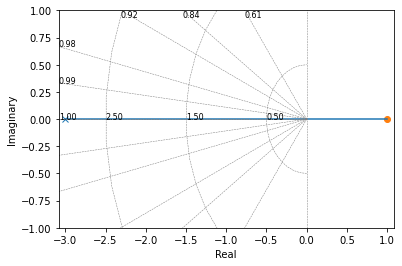

In [11]:
import numpy as np
import control as ctl

num = [1, -1]
den = [1, 3]

tf = ctl.tf(num,den)
ctl.rlocus(tf)
plt.show()

This shows how the poles move through the S plane as you move k. The lines in the map are the lines of constant damping ratio

# PID control

![pid controller](PID_en.svg.png)


e(t) is the error value, as the difference between a desired setpoint SP = r(t) and measured process variable PV = y(t): e(t) = r(t) - y(t)

PID is made up of 3 parts

## Term P 

P is proportional to the current value of the SP-PV error e(t) for example if the error is large and positive the control output will be proportionately large and positive, taking into account the gain factor "K". using proportional control alone will result in an error between the setpoint and the actual process value.

## Term I

I Accounts for the past values of SP - PV error and integrates them over time to produce the I term. For example, if there is a residual SP - PV error after the application of proportional control, the integral term seeks to eliminate the residual error by adding a control effect due to the historic cumulative value of the error. When the error is eliminated, the integral term will cease to grow. This is will result in the proportional effect diminishing as the error decreases, but this is compensated for by the growing integral effect.

## Term D

D is a best estimate of the future trend of the SP-PV error, based on its current rate of change. It is sometimes called "anticipatory control" as it is effectively seeking to reduce the effect of SP-PV error by exerting a control influence generated by the rate of error change. The more rapid the change the greater the controlling or dampening effect


## tuning
The balance of these effects is achieved by looping to produce the optimal function. The tuning constants K are derived for each application. meaning we can change the K values to get the proper response we desire.

## Math

the control function for PID is 

$$ u(t) = K_p e(t) + k_i \int^t_0 e(t') dt' + K_d \frac{de(t)}{dt}$$ 

In the s domain 

$$ G(s) = k_p + \frac{k_i}{s} + k_d s$$

Where $k_p, k_i, k_d$ are all non negative. 


I will now show the effect of each element on a signal

This signal is $\frac{1}{s^2 + 3s + 2}$

ORIGINAL transfer function


      1
-------------
s^2 + 3 s + 2



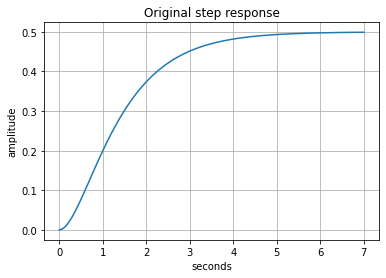

In [12]:
import control as ctl


num = 1
den = [1, 3, 2]
original_tf = ctl.tf(num,den)

print('ORIGINAL transfer function\n')
print(original_tf)
T, yout = ctl.step_response(original_tf)
plt.grid(True)
plt.title('Original step response')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.plot(T,yout)

First i will show what effect $k_p$ has on the system

The transfer function with the controller in it is 

$$T_f = \frac{k_d s^2 + k_p s +k_i}{s^3+(k_d+3)s^2+(k_p + 2)s +k_i} $$

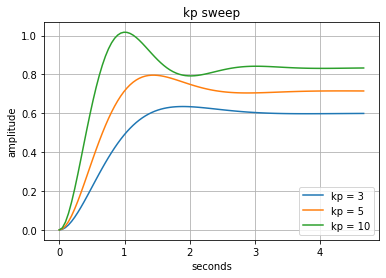

In [13]:
kp_range = [3, 5, 10]
ki = 0
kd = 0

for kp in kp_range:
    num = [kd,kp,ki]
    den = [1, kd+3,kp+2,ki]
    final_tf = ctl.tf(num,den)
    T, yout = ctl.step_response(final_tf)
    plt.plot(T,yout,label="kp = " +str(kp))
plt.grid(True)
plt.title('kp sweep')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.legend()

as you can see when you increase kp it makes the gain higher but the output more wiggly

now change ki while the others are constant

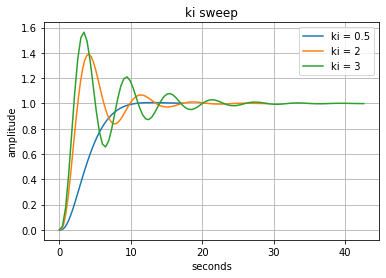

In [14]:
kp = 0
ki_range = [0.5, 2, 3]
kd = 0

for ki in ki_range:
    num = [kd,kp,ki]
    den = [1, kd+3,kp+2,ki]
    final_tf = ctl.tf(num,den)
    T, yout = ctl.step_response(final_tf)
    plt.plot(T,yout,label="ki = " +str(ki))
plt.grid(True)
plt.title('ki sweep')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.legend()

This makes the signal a lot more wiggly. the values for ki have a big effect on the output. ki=10 makes the output oscillate violently. This indicates that the integral term is proportional to both magnitude of the error and the duration of the error

Next we have the derivative term

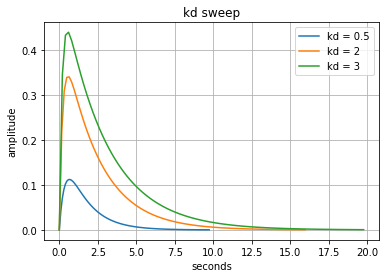

In [15]:
kp = 0
ki = 0
kd_range = [0.5, 2, 3]

for kd in kd_range:
    num = [kd,kp,ki]
    den = [1, kd+3,kp+2,ki]
    final_tf = ctl.tf(num,den)
    T, yout = ctl.step_response(final_tf)
    plt.plot(T,yout,label="kd = " +str(kd))
plt.grid(True)
plt.title('kd sweep')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.legend()

As you can see the derivative value produces a spike then returns to the origin. this is used to smooth out the final state value

# system requirements

The system requirements that we focused on in this class is

Steady state error: the value at the final state of the system

Overshoot: the percentage the signal goes over the target

settling time: the time it takes for the system to settle. This can all be done with the step info command

We we can change the values for the response of theses systems by either doing pole placement or PID control

ORIGINAL transfer function


      1
-------------
s^2 + 3 s + 2

{'RiseTime': 2.571571571571572, 'SettlingTime': 4.51951951951952, 'SettlingMin': 0.44937395164782734, 'SettlingMax': 0.49908853379880513, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.49908853379880513, 'PeakTime': 7.0, 'SteadyStateValue': 0.49908853379880513}


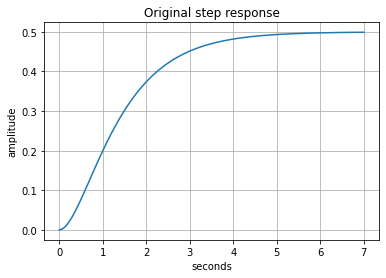

In [16]:
num = 1
den = [1, 3, 2]
original_tf = ctl.tf(num,den)

print('ORIGINAL transfer function\n')
print(original_tf)
T, yout = ctl.step_response(original_tf)
plt.grid(True)
plt.title('Original step response')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.plot(T,yout)
print(ctl.step_info((original_tf)))

{'RiseTime': 2.4214192314733403, 'SettlingTime': 21.792773083260066, 'SettlingMin': 0.8160767402711524, 'SettlingMax': 1.3282062522996014, 'Overshoot': 32.894395513378825, 'Undershoot': 0.0, 'Peak': 1.3282062522996014, 'PeakTime': 4.55226815516988, 'SteadyStateValue': 0.9994448954515072}


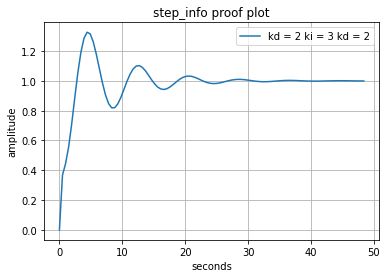

In [17]:
kp_range = [2]
ki_range = [3]
kd_range = [2]

for kd in kd_range:
    for ki in ki_range:
        for kd in kd_range:
            num = [kd,kp,ki]
            den = [1, kd+3,kp+2,ki]
            final_tf = ctl.tf(num,den)
            T, yout = ctl.step_response(final_tf)
            plt.plot(T,yout,label="kd = " +str(kd) + " ki = " +str(ki) +" kd = " +str(kd))
plt.grid(True)
plt.title('step_info proof plot')
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.legend()
print(ctl.step_info(final_tf))

as you can see the step info is different proving you can change the step response by changing these values